<a href="https://colab.research.google.com/github/ashikshafi08/Learning_Tensorflow/blob/main/Notebooks/02_Neural_Network_Classification_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing tensorflow 
import tensorflow as tf
print(tf.__version__)

2.4.1


# Introduction to Neural Network with Tensorflow 

In this notebook we're going to learn how to write neural networks for classification problem.

A classification is where you try to classify as one thing or another, there are few types of classification:
- Binary Classification
- Multi-Class Classification
- Multi-Label Classification

In [2]:
# Creating data to view and fit, getting a toy data 

from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

# Create circles 
X , y = make_circles(n_samples , noise = 0.03 , random_state = 42)

In [3]:
# Check out the features / X
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [4]:
# Checking out the labels 
y[:15] # We are working on Binary Classification

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1])

Our data is little hard to understand now, let's visualize it.

In [5]:
import pandas as pd

# Creating a dataframe with the data
circles = pd.DataFrame({'X0': X[: , 0] , 'X1':X[: , 1] , 'label':y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


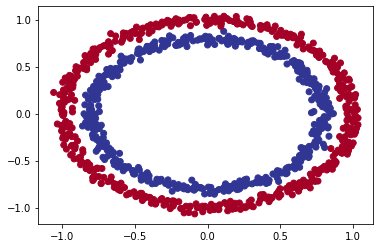

In [6]:
# Visualize the plot 
import matplotlib.pyplot as plt

# Plotting the above data
plt.scatter(X[: , 0] , X[: , 1] , cmap=plt.cm.RdYlBu , c=y);

In [7]:
# Checking the shape of our data 
X.shape , y.shape

((1000, 2), (1000,))

In [8]:
# How many samples we're working with 
len(X) , len(y)

(1000, 1000)

In [9]:
# Viewing the first example of our features and labels 
X[0] , y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in Modelling 

How might we build a classification model to classify whether something is blue dot or red dot.

1. Create a model 
2. Compile the mode
3. Fit the model
4. Evaluate the model 
5. Tweak 
6. Evaluate....

Text(0.5, 0, 'epochs')

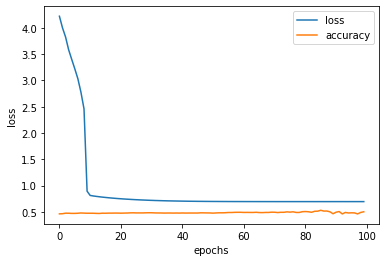

In [10]:
# Taking up the challenge, building a model

# Setting the seed 
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10) , 
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
              optimizer = tf.keras.optimizers.Adam() , 
              metrics = ['accuracy'])

# Fitting the model 
history = model.fit(X , y , epochs = 100 , verbose = 0)

# Plotting the loss curve 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

Following daniel's video to build a model

In [11]:
# Setting the random seed 
tf.random.set_seed(42)

# Creating a model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['accuracy'])

# Fit the model 
model_1.fit(X , y , epochs = 5)

Epoch 1/5
32/32 [==============================] - 0s 2ms/step - loss: 4.1198 - accuracy: 0.4378
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7207 - accuracy: 0.5530
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 0.7033 - accuracy: 0.4836
Epoch 4/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6925 - accuracy: 0.5180
Epoch 5/5
32/32 [==============================] - 0s 2ms/step - loss: 0.6937 - accuracy: 0.5157


It's almost getting 50% correct

In [12]:
# Let's try and improve our model by training longer
model_1.fit(X , y , epochs = 200 , verbose = 0)

In [13]:
 # Evaluating the model 
 model_1.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934829950332642, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy, it's performing as if it's guessing. 

So let's add an extra layer and see how our results go.

In [14]:
# Setting the random seed
tf.random.set_seed(42)

# Creating a model 
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_2.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.SGD() , 
                metrics = ['accuracy'])

# Fit the model
model_2.fit(X , y , epochs = 100 , verbose = 0)

# Evaluate the model 
model_2.fit(X , y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6961 - accuracy: 0.4640


## Improving our model

Let's look into our bag of tricks and see how can we improve the model. 

1. Create a model --> we might need to add more layers (or) increase the number of hidden units within a layer.
2. Compiling a model --> here we might choose a different optimization function.  
3. Fitting a model --> perhaps we might fit our model for more epochs to understand the data better. 


In [15]:
# Set the random seed 
tf.random.set_seed(42)

# Create a model (this time 3 layers)
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), 
  tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fitting the model
model_3.fit(X , y , epochs = 100 , verbose = 0)

# Evaluate the model 
model_3.evaluate(X , y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6980 - accuracy: 0.5090


[0.6980189681053162, 0.5090000033378601]

Since our model's performance wasn't improving it's better to visualize of our model's predictions so we could get a glimpse where we're going off.

Let's visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:
- Take in a trained model, feature (X) and labels (y).
- Create a meshgrid of different X values. 
- Make predictions across the mesh grid. 
- Plot the predictions as well as a line between zones (where each unique class falls). 


In [16]:
# Importing numpy 
import numpy as np

def plot_decision_boundary(model , X , y):
  '''
  Plots the decision boundary created by a model predicting on X
  '''
  # Define the axis boundary of the plot and create a meshgrid
  x_min , x_max = X[: , 0].min() - 0.1 , X[: , 0].max() + 0.1   # 0.1 gives the margin
  y_min , y_max = X[: , 1].min() - 0.1 , X[: , 1].max() + 0.1
  xx , yy = np.meshgrid(np.linspace(x_min , x_max,  100) , np.linspace(y_min , y_max , 100)) # return 100 values equally between those values

  # Create X values (we're going to make predictions on these)
  x_in = np.c_[xx.ravel() , yy.ravel()] # Stack 2D arrays together 

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class 
  if len(y_pred[0]) > 1:
    print('Doing Multi-Class Classification')
    # If so, we have to reshape our predictions to get them plotting
    y_pred = np.argmax(y_pred , axis = 1).reshape(xx.shape)
  else: 
    print('Doing Binary Classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())



Doing Binary Classification


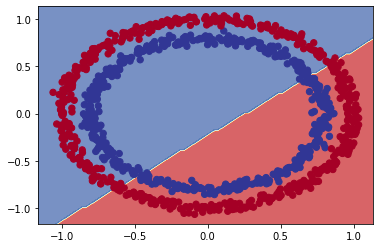

In [17]:
# Check out the predictions our models predicting
plot_decision_boundary(model = model_3 , 
                       X = X , 
                       y = y)

Our model is trying to draw a line which in our case won't help since we are dealing with classification problem. The straight line is a linear decision boundary (line) but here we have a non-linear data (data not lined up in a linear way). 

Whenever your model is performing strangely or there's something going odd, visualize, visualize , visualize.

Let's see if our model can be used for a regression model!


In [18]:
# Create some regression data 
tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100 , 1100 , 5) # the function we're trying to predict is y = x + 10

# Let's split our data in train and test
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Checkin the shape 
X_reg_train.shape , X_reg_test.shape , y_reg_train.shape ,  y_reg_test.shape

# Fit our model to the regression data 
# model_3.fit(X_reg_train , y_reg_train , epochs = 100)

(TensorShape([150]), TensorShape([50]), TensorShape([150]), TensorShape([50]))

The error is because earlier we compiled our model for the **Binary Classification** problem, but now we're trying to fit a data which doesn't represent a classification problem nor could satisfy our model needs as we described before. 

```
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/func_graph.py in wrapper(*args, **kwargs)
    975           except Exception as e:  # pylint:disable=broad-except
    976             if hasattr(e, "ag_error_metadata"):
--> 977               raise e.ag_error_metadata.to_exception(e)
    978             else:
    979               raise

ValueError: in user code:

    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:805 train_function  *
        return step_function(self, iterator)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/distribute/distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:788 run_step  **
        outputs = model.train_step(data)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:754 train_step
        y_pred = self(x, training=True)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/input_spec.py:259 assert_input_compatibility
        ' but received input with shape ' + display_shape(x.shape))

    ValueError: Input 0 of layer sequential_3 is incompatible with the layer: expected axis -1 of input shape to have value 2 but received input with shape (None, 1)
```

Let's change our model to deal with the regression model.

In [19]:
# Getting ready for regression data 
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
 tf.keras.layers.Dense(100), 
 tf.keras.layers.Dense(10),
 tf.keras.layers.Dense(1)
])

# Compile the model 
model_3.compile(loss = tf.keras.losses.mae , 
                optimizer = tf.keras.optimizers.Adam(), 
                metrics = ['mae'])

# Fit the model
history = model_3.fit(X_reg_train , y_reg_train , epochs = 100 , verbose = 0)

# Evaluating on test data 
model_3.evaluate(X_reg_test , y_reg_test)

2/2 [==============================] - 0s 6ms/step - loss: 57.8962 - mae: 57.8962


[57.89622116088867, 57.89622116088867]

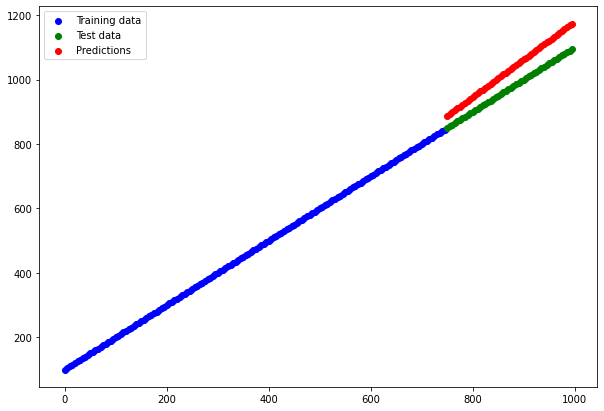

In [20]:
# Make predictions 
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's prediction against our regression data 
plt.figure(figsize = (10 ,7))
plt.scatter(X_reg_train , y_reg_train , c='b' , label = 'Training data')
plt.scatter(X_reg_test , y_reg_test , c='g' , label ='Test data')
plt.scatter(X_reg_test , y_reg_preds , c='r' , label = 'Predictions')
plt.legend();

We should tweak into Non-linearity (missing piece)

## Non-Linearity



In [21]:
# Let's build a model at first 
tf.random.set_seed(42)

# Create a model 
model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(1 , activation=tf.keras.activations.linear), # using a activation for our layer

])

# Compile our model 
model_4.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001), 
                metrics = ['accuracy'])

# Fit the model 
history = model_4.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

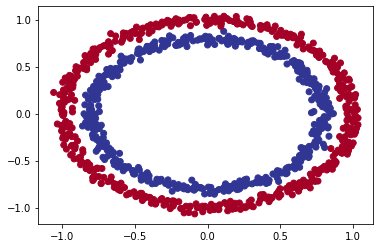

In [22]:
# Check out our data 
plt.scatter(X[: , 0] , X[: , 1] , c=y , cmap = plt.cm.RdYlBu)

Doing Binary Classification


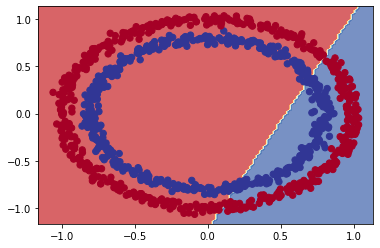

In [23]:
# Check the decision boundary for our latest model 
plot_decision_boundary(model=model_4 , X=X , y=y)

Let's try build our first neural network with a non-linear activation function (anything that isn't linear). 

In [24]:
# Set random seed 
tf.random.set_seed(42)

# Create a model with non-linear activation 
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu)
])

# Compile the model 
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam() , 
                metrics = ['accuracy'])

# Fit the model 
history = model_5.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 4.6225 - accuracy: 0.4548
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 4.3079 - accuracy: 0.4220
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 4.5266 - accuracy: 0.4276
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 4.0583 - accuracy: 0.4295
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 4.2318 - accuracy: 0.4045
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 3.7717 - accuracy: 0.4447
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9152 - accuracy: 0.4201
Epoch 8/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5773 - accuracy: 0.4180
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 3.9012 - accuracy: 0.3986
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 3.5076 - accuracy: 0.4451
Epoch 11/

Time to replicate the multi-layer neural network from the TensorFlow Playground 

In [25]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu),
  tf.keras.layers.Dense(1)
])

# Compiling the model 
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001) , 
                metrics = ['accuracy'])

# Fit the model 
history = model_6.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 3ms/step - loss: 7.9753 - accuracy: 0.4830
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 7.8983 - accuracy: 0.4880
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 7.8184 - accuracy: 0.4931
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 7.7682 - accuracy: 0.4964
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 7.9795 - accuracy: 0.4827
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 7.2219 - accuracy: 0.5318
Epoch 7/100
32/32 [==============================] - 0s 2ms/step - loss: 7.6230 - accuracy: 0.5058
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 7.7149 - accuracy: 0.4998
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 8.0269 - accuracy: 0.4796
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 7.4648 - accuracy: 0.5161
Epoch 11/

In [26]:
# Evaluting the model 
model_6.evaluate(X , y)

32/32 [==============================] - 0s 1ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

Let's visualize our model's predictions

Doing Binary Classification


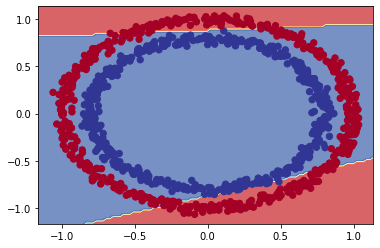

In [27]:
# Using the function 
plot_decision_boundary(model_6 , X , y)

Using the `sigmoid` activation function to our output layer! 

In [28]:
# Final Model!!!!!! 
tf.random.set_seed(42)

# Create model 
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation= tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation= tf.keras.activations.relu) , 
  tf.keras.layers.Dense(1 , activation= tf.keras.activations.sigmoid)
])

# Compile the model 
model_7.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.001) ,
                metrics = ['accuracy'])

# Fit the model 
history = model_7.fit(X , y , epochs = 100)

Epoch 1/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6954 - accuracy: 0.4875
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6801 - accuracy: 0.5470
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6841 - accuracy: 0.5004
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6817 - accuracy: 0.5259
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6789 - accuracy: 0.5237
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.5427
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6808 - accuracy: 0.5396
Epoch 9/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6795 - accuracy: 0.5360
Epoch 10/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6769 - accuracy: 0.5418
Epoch 11/

In [29]:
# Let's evaluate our model 
model_7.evaluate(X , y )

32/32 [==============================] - 0s 2ms/step - loss: 0.2948 - accuracy: 0.9910


[0.2948004901409149, 0.9909999966621399]

Doing Binary Classification


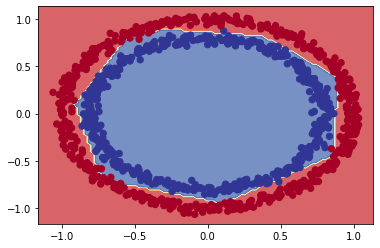

In [30]:
# Let's visualize our great model how it works 
plot_decision_boundary(model_7 , X , y)

🔑  **Note:** The combination of *linear* (straigh lines) and *non-linear* (non straight lines) functions is one of the key fundamentals of neural networks. 

Now we've discussed the concept of linear and non-linear functions (or lines), lets see them in action.

In [31]:
# Create a toy tensor 
A = tf.cast(tf.range(-10 , 10 ) , tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

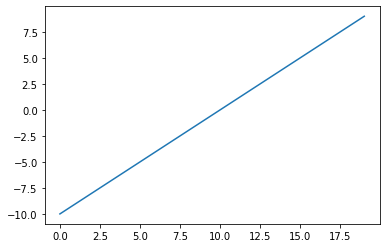

In [32]:
# Visualize our toy tensor --> A linear line 
plt.plot(A)

Let's start by replicating a `sigmoid` function
Formula : `sigmoid(x) = 1 / (1 + exp(-x)).`

In [33]:
# Coding our own one 
def sigmoid(x):
  return 1 / (1 + tf.math.exp(-x))

# Using our function 
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

In [34]:
# Now using the available tensorflow one 
tf.math.sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397868e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726230e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105854e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

([<matplotlib.lines.Line2D at 0x7fa974b8eed0>],
 [<matplotlib.lines.Line2D at 0x7fa974b9a790>])

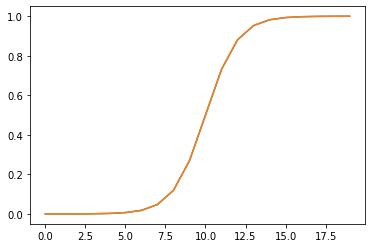

In [35]:
# Let's plot and see how they look 
plt.plot(sigmoid(A)) , plt.plot(tf.math.sigmoid(A))

At first (A) was originally straigh but now using the `sigmoid` we got a non-linear shaped plot above.

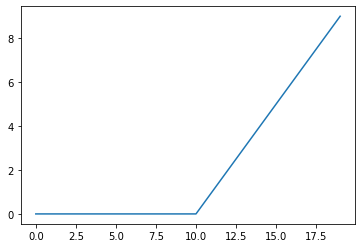

In [36]:
# Creating a relu function 
def relu(x):
  return tf.maximum(0 , x)

# Let's use our toy tensor 
plt.plot(relu(A))

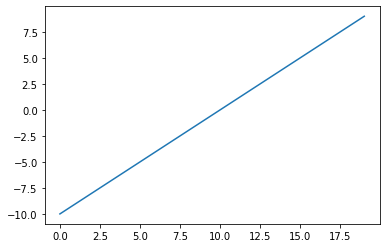

In [37]:
# Using the linear activation function --> which doesn't change anything 
plt.plot(tf.keras.activations.linear(A))

In [38]:
# Does the value got changed 
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

The fact is the `linear` doesn't even made a change to the input data, it just pass by the value onto the network. 

## Evaluating and Improving our Classification

So far we've been training and testing on the same dataset. However in machine learning basically it's a sin.

So let's create a training and test set

In [39]:
# Check how many examples we have 
len(X) 

1000

In [40]:
# Using sklearn to split the data 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

# Checking the shape 
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((800, 2), (200, 2), (800,), (200,))

Let's create a model fit on the training data and evaluate on the test data

In [41]:
# Set the random seed 
tf.random.set_seed(42)

# Create the model 
model_8 = tf.keras.Sequential([
  tf.keras.layers.Dense(4 , activation=tf.keras.activations.relu) , 
  tf.keras.layers.Dense(4 , activation = tf.keras.activations.relu), 
  tf.keras.layers.Dense(1 , activation = tf.keras.activations.sigmoid)
])

# Compile the model 
model_8.compile(loss = tf.keras.losses.BinaryCrossentropy() , 
                optimizer = tf.keras.optimizers.Adam(lr = 0.01) , # how much our modle should improve the model
                metrics = ['accuracy'])

# Fit the model 
history = model_8.fit(X_train , y_train , epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6849 - accuracy: 0.5343
Epoch 2/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6788 - accuracy: 0.5528
Epoch 3/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6724 - accuracy: 0.5707
Epoch 4/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6660 - accuracy: 0.5852
Epoch 5/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6604 - accuracy: 0.5739
Epoch 6/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6366 - accuracy: 0.6207
Epoch 7/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6320 - accuracy: 0.6297
Epoch 8/25
25/25 [==============================] - 0s 2ms/step - loss: 0.6109 - accuracy: 0.7071
Epoch 9/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5901 - accuracy: 0.7338
Epoch 10/25
25/25 [==============================] - 0s 2ms/step - loss: 0.5453 - accuracy: 0.7815
Epoch 11/25
25/25 [

In [43]:
# Evaluate the model on test data 
model_8.evaluate(X_test , y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.1886 - accuracy: 0.9450


[0.18863719701766968, 0.9449999928474426]

Doing Binary Classification
Doing Binary Classification


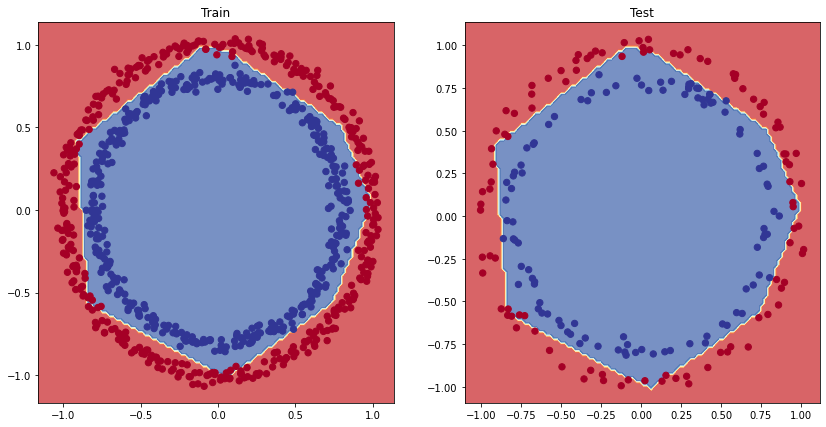

In [48]:
# Plotting the decision boundary for training and test sets 

plt.figure(figsize=(14 , 7))
plt.subplot(1, 2 ,1)
plt.title('Train')
plot_decision_boundary(model_8 , X_train , y_train)
plt.subplot(1 , 2, 2) 
plt.title('Test')
plot_decision_boundary(model_8 , X_test , y_test)

All we did is took the previous model (`model_7`) and tweaked the **learning rate** and increased it by 10 times of the previous learning rate.

#### **Plot the loss (or training) curve**

In [49]:
# Convert history object into a dataframe 
pd.DataFrame(history.history)

,loss,accuracy
0,0.682350,0.56375
1,0.674970,0.56500
2,0.667972,0.57625
3,0.663489,0.57250
4,0.659155,0.57125
5,0.647489,0.59375
6,0.631162,0.62750
7,0.609302,0.69625
8,0.584372,0.72125
9,0.544250,0.76750


Text(0.5, 1.0, 'Model_8 loss curve')

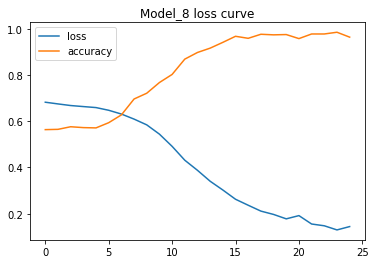

In [51]:
# Plot the loss curve 
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curve')

🔑  **Note:** For many problems the loss function going down means the model is improving (the preds is getting are getting close to the ground truth labels). 